# **Project 3**, APS1070 Fall 2021
#### **PCA [10 marks]**
**Deadline: Nov 5th, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: shubowan
*   **Student number**: 1007826907



In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started [1 Marks]

In [1]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

In [2]:
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908,7107,7432,7625,7870,8063,8364,8580,8791,9027,9222,9635,9835,10048,10337,10630,10881,11304
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838,308048,308350,308732,309036,309333,309644,309853,310026,310026,310544,310544,311018,311018,311018,311534,311690,311948
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731,6737,6742,6751,6759,6767,6773,6780,6787,6812,

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.25]**
When the curve goes closer to the zero, it means the cases is closer to the average cases of all countries in the world. Positive means the cases are more than average and negative means cases are less than the average.

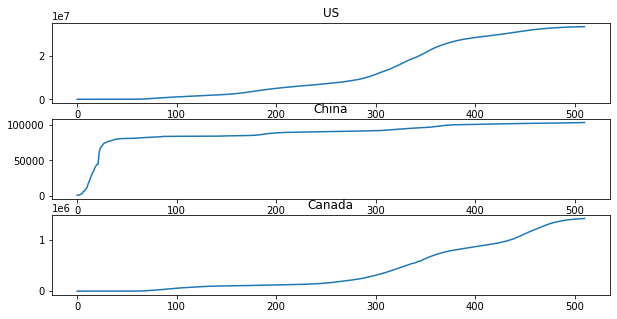

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def time_series(df,country):
  time_series=df.loc[country,:]
  fig,ax=plt.subplots(len(country))
  fig.set_size_inches(10,5)
  for i in range(len(country)):
    x=range(len(time_series.columns))
    y=time_series.loc[[country[i]],:].values[0]
    ax[i].set_title(country[i])
    ax[i].plot(x,y)
time_series(cases_raw,['US','China','Canada'])

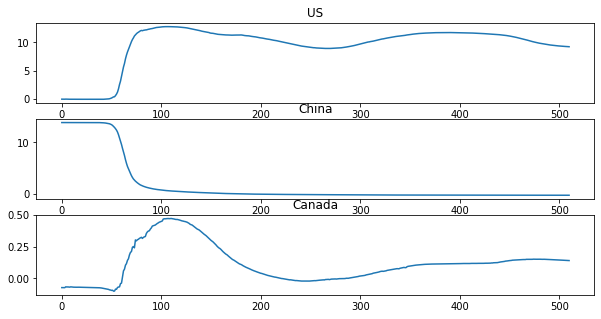

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cases_raw)
standard_data=scaler.transform(cases_raw)
standard_df=pd.DataFrame(data=standard_data,columns=cases_raw.columns,index=cases_raw.index)
time_series(standard_df,['US','China','Canada'])

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**
First few PCs are more stable and rest of them have more fluctuations. First two finally go down and the rest go up and down repeatedly.


In [5]:
from numpy import linalg as LA
def get_sorted_eigen(df_cov):
  w,v=LA.eigh(df_cov)
  return w,v

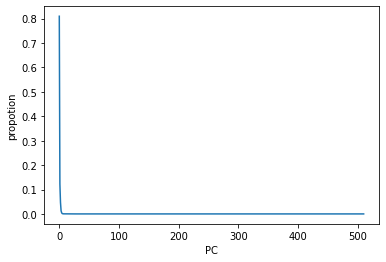

In [6]:
covMatrix=np.cov(standard_data,rowvar=False)
w,v=get_sorted_eigen(covMatrix)
w=w[::-1]
v=v[:,::-1]
plt.xlabel('PC')
plt.ylabel('propotion')
x=range(len(w))
y=w/sum(w)
plt.plot(x,y)

In [7]:
prop,count,i=0,0,0
while prop<0.99:
  prop+=w[i]/sum(w)
  count+=1
  i+=1
print(count,'PCs needed to cover 99% variance')

4 PCs needed to cover 99% variance


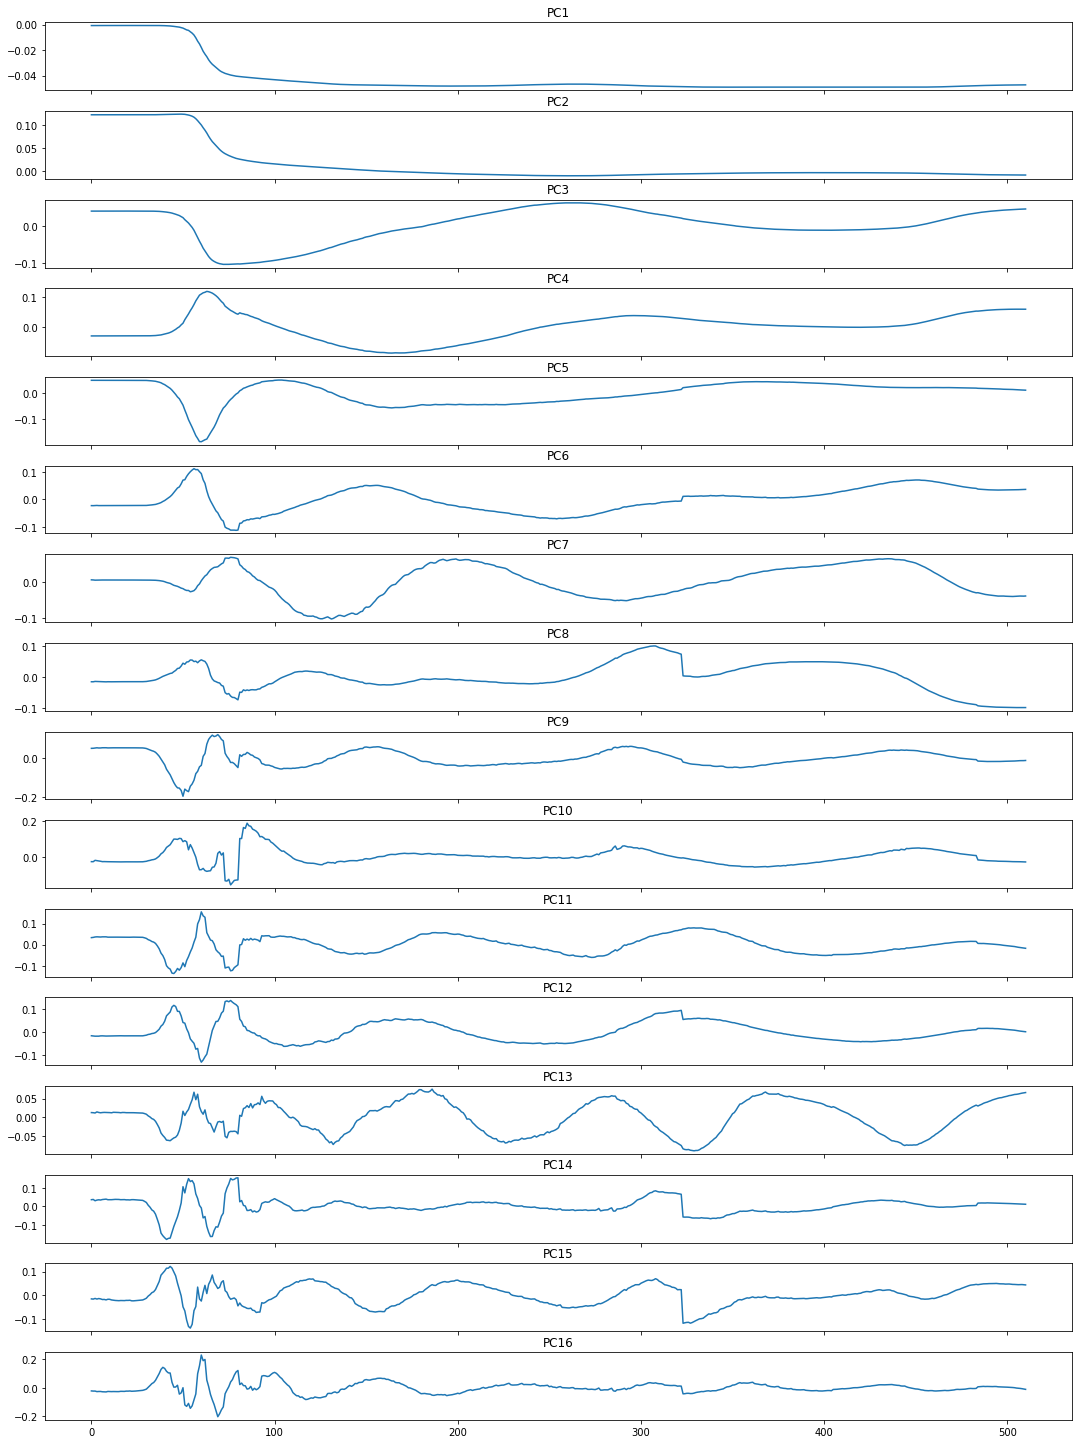

In [8]:
fig,ax=plt.subplots(16,sharex=True)
fig.set_size_inches(15,20)
fig.tight_layout()
for i in range(16):
  x=range(len(standard_df.columns))
  y=v[:,i]
  ax[i].set_title('PC'+str(i+1))
  ax[i].plot(x,y)

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def plot_country_figures(original_df, country_name):
  scaler=StandardScaler()
  standard_data=scaler.fit_transform(original_df)

  plt.figure()
  plt.title('original time series')
  x=range(original_df.columns.shape[0])
  y=original_df.loc[country_name,:].values
  plt.plot(x,y)

  covMatrix=np.cov(standard_data,rowvar=False)
  w,v=get_sorted_eigen(covMatrix)
  w=w[::-1]
  v=v[:,::-1]

  plt.figure()
  plt.title('reconstructed time series')
  for i in [1,2,4,8,16]:
    scores=np.matmul(standard_data,v[:,:i])
    recons=np.matmul(scores,v[:,:i].T)
    recons=scaler.inverse_transform(recons)
    index=np.argwhere(original_df.index.values==country_name)[0][0]
    x=range(len(recons[index,:]))
    y=recons[index,:]
    if i==1:
      plt.plot(x,y,label='PC1')
    elif i==2:
      plt.plot(x,y,label='PC1,2')
    elif i==4:
      plt.plot(x,y,label='PC1-4')
    elif i==8:
      plt.plot(x,y,label='PC1-8')
    else: plt.plot(x,y,label='PC1-16')
    plt.legend()
    
  plt.figure()
  plt.title('residual error')
  scores=np.matmul(standard_data,v[:,0:8])
  recons=np.matmul(scores,v[:,0:8].T)
  recons=scaler.inverse_transform(recons)
  residual_error=original_df.values[index,:]-recons[index,:]
  x=range(len(residual_error))
  y=residual_error
  plt.plot(x,y,label='PC1-8')
  plt.legend()

  plt.figure()
  plt.title('RMSE')
  RMSE=[]
  for i in range(1,11):
    scores=np.matmul(standard_data,v[:,:i])
    recons=np.matmul(scores,v[:,:i].T)
    recons=scaler.inverse_transform(recons)
    rmse=sqrt(mean_squared_error(original_df.values[index,:],recons[index,:]))
    RMSE.append(rmse)
  x=range(1,11)
  y=RMSE
  plt.plot(x,y)

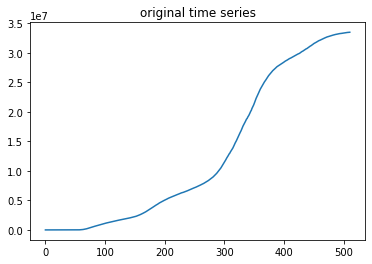

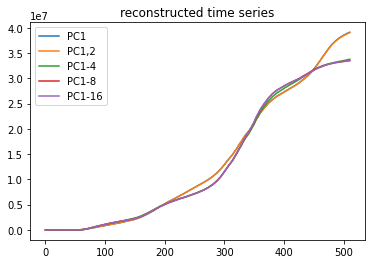

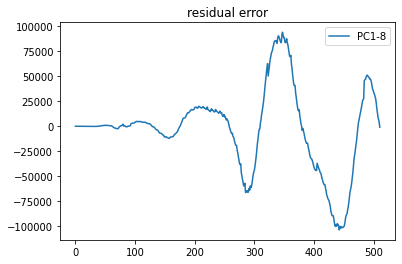

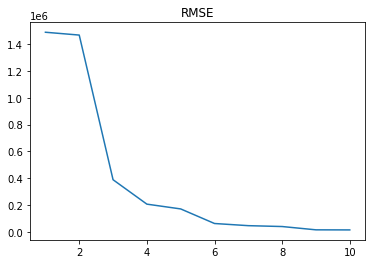

In [25]:
plot_country_figures(cases_raw,'US')

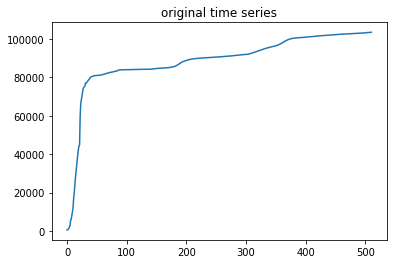

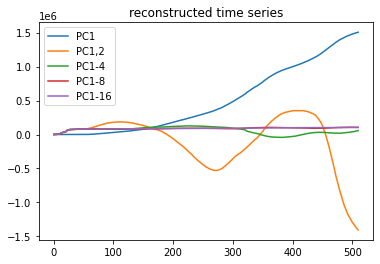

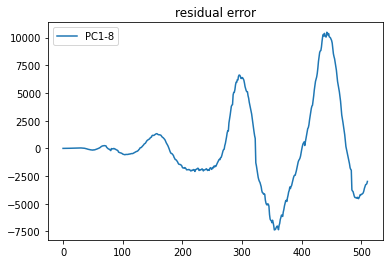

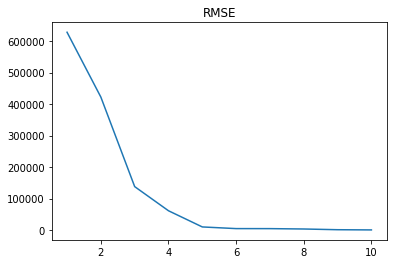

In [26]:
plot_country_figures(cases_raw,'China')

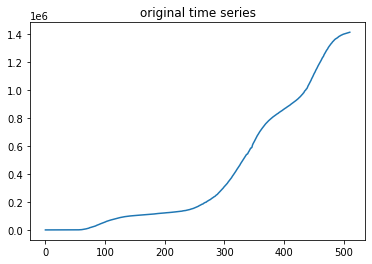

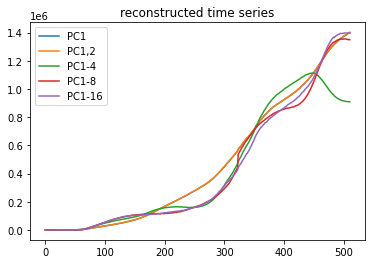

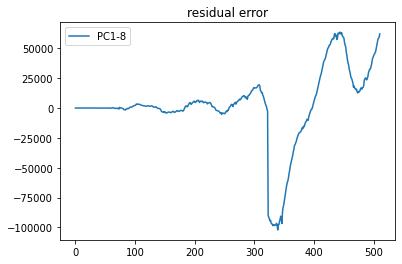

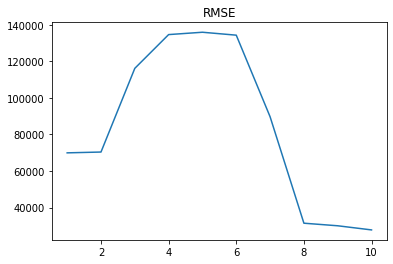

In [27]:
plot_country_figures(cases_raw,'Canada')

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. **[1]**

Standardiztion or covariance computation is not required for the svd. SVD does not need to compute covariance to get the elgenvectors.

The residual error and RMSE between svd and pca are somewhat different but not much.The reason may be standardization wasn't used in svd. The reconstruction data curve of svd is similar to pca except China which may also be caused by standardization. Actually we can see even if PC1 and PC1,2 of China don't fit well, when the the number PC increases, the error and rmse decrease to an accepted range.

In [28]:
def plot_country_figures_svd(original_df, country_name):
  data=original_df.values
  plt.figure()
  plt.title('original time series')
  x=range(original_df.columns.shape[0])
  y=original_df.loc[country_name,:].values
  plt.plot(x,y)
    
  u,s,v=LA.svd(data)
  v=v.T
  S=np.diag(s)
  index=np.argwhere(original_df.index.values==country_name)[0][0]

  plt.figure()
  plt.title('reconstructed time series')
  for i in [1,2,4,8,16]:
    scores=np.matmul(data,v[:,:i])
    recons=np.matmul(scores,v[:,:i].T)
    x=range(len(recons[index,:]))
    y=recons[index,:]
    if i==1:
      plt.plot(x,y,label='PC1')
    elif i==2:
      plt.plot(x,y,label='PC1,2')
    elif i==4:
      plt.plot(x,y,label='PC1-4')
    elif i==8:
      plt.plot(x,y,label='PC1-8')
    else: plt.plot(x,y,label='PC1-16')
    plt.legend()

  plt.figure()
  plt.title('residual error')
  scores=np.matmul(data,v[:,:16])
  recons=np.matmul(scores,v[:,:16].T)
  residual_error=data[index,:]-recons[index,:]
  x=range(len(residual_error))
  y=residual_error
  plt.plot(x,y,label='PC1-16')
  plt.legend()

  plt.figure()
  plt.title('RMSE')
  RMSE=[]
  for i in range(1,11):
    scores=np.matmul(data,v[:,:i])
    recons=np.matmul(scores,v[:,:i].T)
    rmse=sqrt(mean_squared_error(original_df.values[index,:],recons[index,:]))
    RMSE.append(rmse)
  x=range(1,11)
  y=RMSE
  plt.plot(x,y)

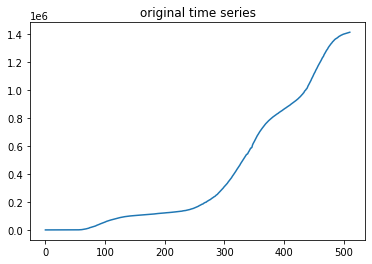

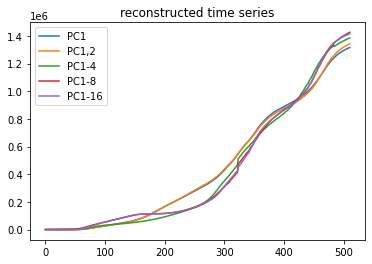

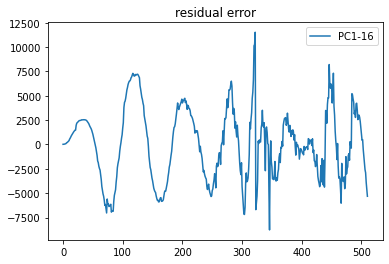

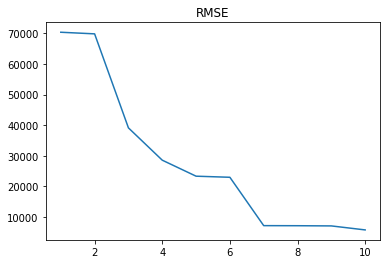

In [29]:
plot_country_figures_svd(cases_raw,'Canada')

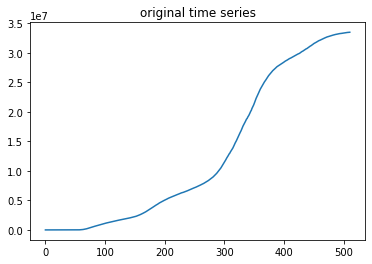

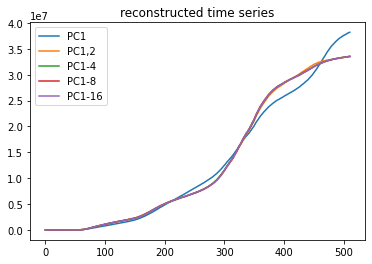

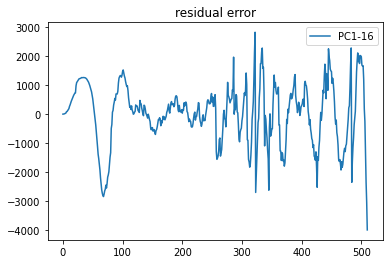

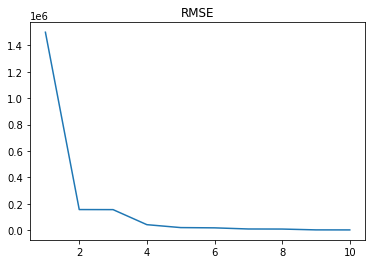

In [30]:
plot_country_figures_svd(cases_raw,'US')

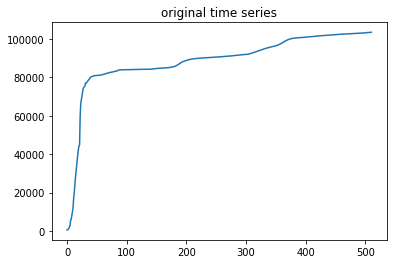

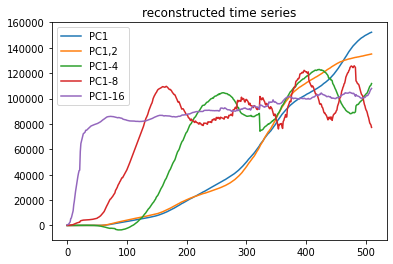

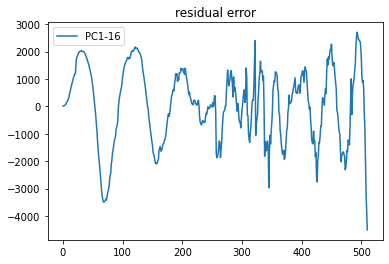

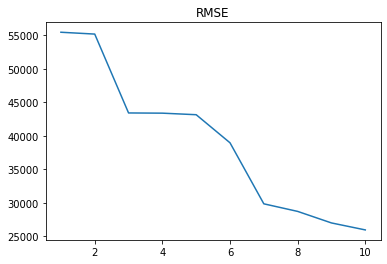

In [31]:
plot_country_figures_svd(cases_raw,'China')

# Part 5: Let's collect a more recent dataset! [2 Marks]
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. **[1]**


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




In [17]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving countries-aggregated_csv.csv to countries-aggregated_csv.csv


In [18]:
df2=pd.read_csv('countries-aggregated_csv.csv')
df2

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
125965,2021-10-24,Zimbabwe,132651,0,4669
125966,2021-10-25,Zimbabwe,132688,0,4673
125967,2021-10-26,Zimbabwe,132724,0,4674
125968,2021-10-27,Zimbabwe,132808,0,4675


In [19]:
dic={}
countries=df2['Country'].unique()
Date=df2['Date'].unique()
dataset=[]
for name in countries:
  dataset.append(df2[df2['Country']==name]['Confirmed'].values)
country_aggregated=pd.DataFrame(data=dataset,columns=Date,index=countries)

In [20]:
country_aggregated

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-09-19,2021-09-20,2021-09-21,2021-09-22,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16,2021-10-17,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,154487,154585,154712,154757,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,162953,163404,164276,165096,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,201600,201766,201948,202122,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15124,15140,15140,15153,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52307,52644,52968,53387,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,687063,695744,707436,718963,728435,736972,746678,756689,766051,770640,779398,790755,797712,803202,808578,813961,818324,822687,826837,831643,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,384390,386493,388470,390369,392452,394683,395677,396746,398946,400649,402255,403716,405056,405780,406652,408211,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8667,8718,8752,8789,8830,8861,8891,8934,8988,9016,9039,9067,9111,9139,9139,9214,9234,9271,9299,9333,9345,9369,9402,9412,9439,9467,9495

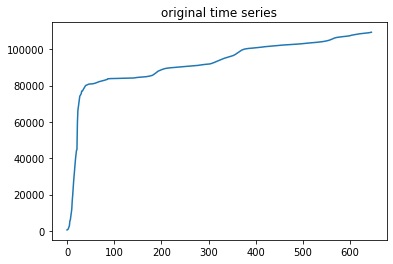

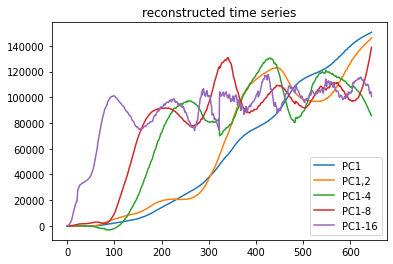

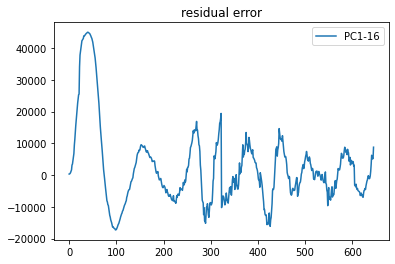

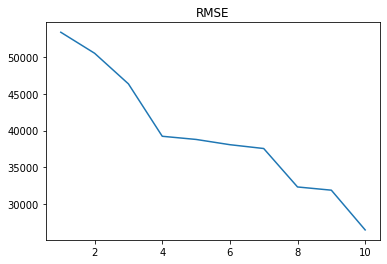

In [32]:
plot_country_figures_svd(country_aggregated,'China')

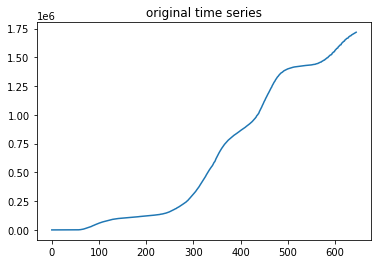

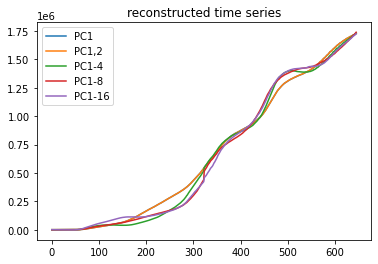

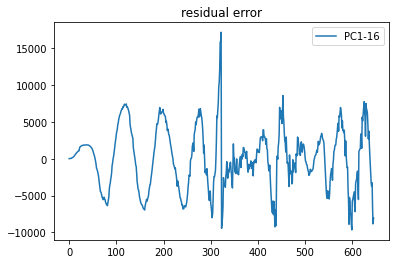

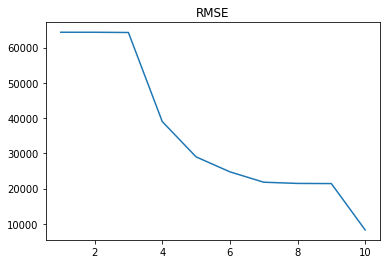

In [33]:
plot_country_figures_svd(country_aggregated,'Canada')

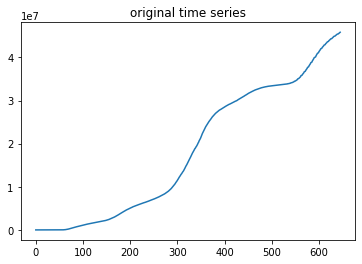

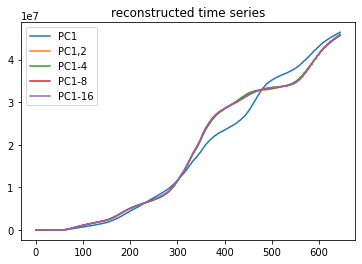

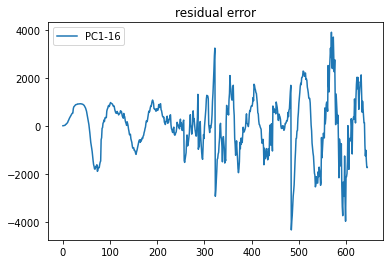

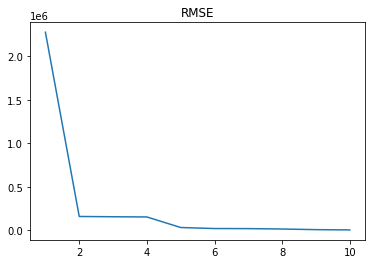

In [34]:
plot_country_figures_svd(country_aggregated,'US')

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

